<a href="https://colab.research.google.com/github/HanaeELMEKKI/COMP-6321-Assignment-1/blob/main/Implementation_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise Description:**
Design and train two neural networks to tackle the regression and classification
tasks in Question 1 and Question 2. Use the same datasets and train-test
split ratio. Build and train neural networks using PyTorch. Report on the
performance of the NN models, and compare them with the models developed
using Linear Regression and Logistic Regression.

In [707]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# **Classification:**

In [708]:
#read cvs file into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/HanaeELMEKKI/COMP-6321-Assignment-1/main/Question2/lung_cancer_dataset.csv")

In [709]:
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [710]:
#Normalization
df_trn, df_tst = train_test_split( df, test_size=0.3)
X_trn = df_trn.drop(columns=['LUNG_CANCER'])
y_trn = df_trn['LUNG_CANCER']

X_tst = df_tst.drop(columns=['LUNG_CANCER'])
y_tst = df_tst['LUNG_CANCER']

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.transform(X_tst)

y_trn = scaler.fit_transform(y_trn.values.reshape(-1, 1))
y_tst = scaler.fit_transform(y_tst.values.reshape(-1, 1))

In [711]:
X_trn_torch = torch.tensor (X_trn, dtype=torch.float32)
y_trn_torch = torch.tensor (y_trn, dtype=torch.float32).reshape(-1,1)
X_tst_torch = torch.tensor (X_tst, dtype=torch.float32)
y_tst_torch = torch.tensor (y_tst, dtype=torch.float32).reshape(-1,1)

In [712]:
# Define the Model
model = nn.Sequential(
    nn.Linear(15, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
)

Epoch  0: loss on final training batch: 0.6618
Epoch  1: loss on final training batch: 0.6312
Epoch  2: loss on final training batch: 0.5899
Epoch  3: loss on final training batch: 0.5420
Epoch  4: loss on final training batch: 0.4916
Epoch  5: loss on final training batch: 0.4424
Epoch  6: loss on final training batch: 0.3955
Epoch  7: loss on final training batch: 0.3515
Epoch  8: loss on final training batch: 0.3106
Epoch  9: loss on final training batch: 0.2732
Loss on test set: 0.3125


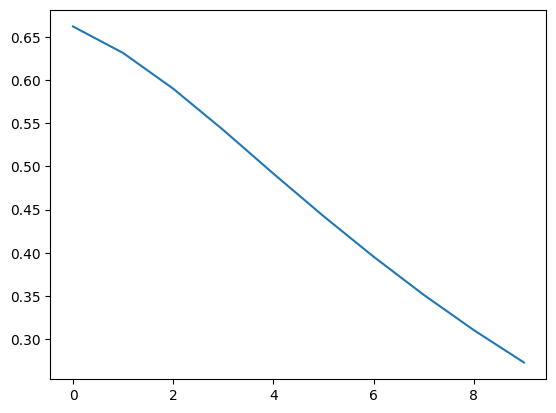

In [713]:
# Train the model
torch.manual_seed(0)
history = []
loss_bce = nn.BCEWithLogitsLoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
epochs = 10
batch_size = 100
for epoch in range(epochs):
    for i in range(0, len(X_trn), batch_size):
        X = X_trn_torch[i:i+batch_size]
        y = y_trn_torch[i:i+batch_size]

        y_pred = model(X)
        l = loss_bce(y_pred, y)

        model.zero_grad()
        l.backward()
        optimizer.step()
    history.append(l.item())

    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))

print("Loss on test set: %.4f" % (loss_bce(model(X_tst_torch), y_tst_torch)))
plt.plot(history)
plt.show()

# **Regression**

In [714]:
#read cvs file into dataframe
df = pd.read_csv("https://raw.githubusercontent.com/HanaeELMEKKI/COMP-6321-Assignment-1/main/Question1/Health_Insurance_Dataset.csv")

In [715]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['region'] = label_encoder.fit_transform(df['region'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

In [716]:
#Normalization

df_trn, df_tst = train_test_split( df, test_size=0.3)
X_trn = df_trn.drop(columns=['charges'])
y_trn = df_trn['charges']

X_tst = df_tst.drop(columns=['charges'])
y_tst = df_tst['charges']

scaler = StandardScaler()
X_trn = scaler.fit_transform(X_trn)
X_tst = scaler.transform(X_tst)
y_trn = scaler.fit_transform(y_trn.values.reshape(-1, 1))
y_tst = scaler.fit_transform(y_tst.values.reshape(-1, 1))

In [717]:
X_trn_torch = torch.tensor (X_trn, dtype=torch.float32)
y_trn_torch = torch.tensor (y_trn, dtype=torch.float32).reshape(-1,1)
X_tst_torch = torch.tensor (X_tst, dtype=torch.float32)
y_tst_torch = torch.tensor (y_tst, dtype=torch.float32).reshape(-1,1)

In [718]:
# Define the Model
model = nn.Sequential(
    nn.Linear(6, 12),
    nn.ReLU(),
    nn.Linear(12, 4),
    nn.ReLU(),
    nn.Linear(4, 2),
    nn.ReLU(),
    nn.Linear(2, 1)
)

Epoch  0: loss on final training batch: 1.2010
Epoch  1: loss on final training batch: 1.1830
Epoch  2: loss on final training batch: 1.1806
Epoch  3: loss on final training batch: 1.1786
Epoch  4: loss on final training batch: 1.1795
Epoch  5: loss on final training batch: 1.1777
Epoch  6: loss on final training batch: 1.1771
Epoch  7: loss on final training batch: 1.1769
Epoch  8: loss on final training batch: 1.1762
Epoch  9: loss on final training batch: 1.1743
Loss on test set: 0.9959


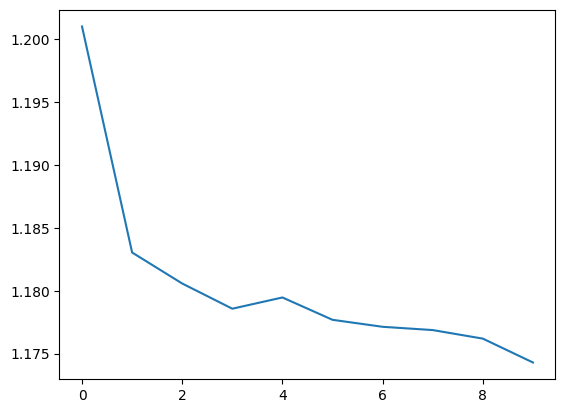

In [719]:
# Train the model
history_regression = []
torch.manual_seed(0)
loss_mse = nn.MSELoss()  # Mean Square Error
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, momentum=0.9)
batch_size = 100

# Training the model
epochs = 10
for epoch in range(epochs):

    for i in range(0, len(X_trn), batch_size):
        X = X_trn_torch[i:i+batch_size]
        y = y_trn_torch[i:i+batch_size]

        y_pred = model(X)
        l = loss_mse(y_pred, y)

        model.zero_grad()
        l.backward()
        optimizer.step()
    history_regression.append(l.item())

    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, l.item()))

print("Loss on test set: %.4f" % (loss_mse(model(X_tst_torch), y_tst_torch)))
plt.plot(history_regression)
plt.show()